# Exercise 2-1: Logistic Regression

In this exercise, we will implement logistic regression and apply it to two different datasets. 

## Load Data

In `ex2data1.txt`, the first two columns contains the exam scores and the third column contains the label.

In [1]:
import numpy as np


data = np.loadtxt(open("ex2data1.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]

## Part 1: Plotting

The `plot_data()` plots the given data points X and y.

In [2]:
import matplotlib.pyplot as plt


def plot_data(X, y):
    """
    Plots the data points X and y.

    Parameters
    ----------
    X : array-like, shape (n_samples, 2)
        Data on x axis.
    y : array-like, shape (n_samples,)
        Data on y axis.
    """
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)

    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')

Plot the dataset:

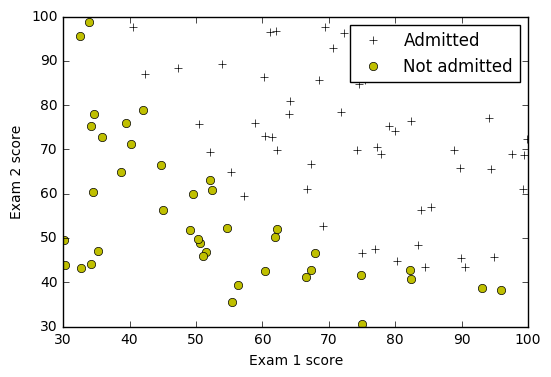

In [3]:
plt.figure()
plot_data(X, y)
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)
plt.show()

## Part 2: Compute Cost and Gradient

Initialize training parameters as follows:

In [4]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
# Add intercept term to x and X_test
X = np.hstack((np.ones((m, 1)), X))
# Initialize fitting parameters
theta = np.zeros(n + 1)  # Initialize fitting parameters

To compute the cost, we need to implement the sigmoid function first.

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array-like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

The `cost_function()` computes the cost and gradient for logistic regression.

In [6]:
def cost_function(theta, X, y):
    """
    Compute cost and gradient for logistic regression.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in x and y.
    grad: ndarray, shape (n_features,)
        The gradient of the cost w.r.t. the parameters.
    """
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return J, grad

Test the `cost_function()` on initial values:

In [7]:
cost, grad = cost_function(theta, X, y)

print 'Cost at initial theta (zeros):', cost
print 'Gradient at initial theta (zeros):', grad

Cost at initial theta (zeros): 0.69314718056
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


## Part 3: Optimizing using `fmin_tnc()`

Train the model with `fin_tnc()`:

In [8]:
import scipy.optimize as opt


theta, nfeval, rc = opt.fmin_tnc(func=cost_function, x0=theta, args=(X, y))

cost, _ = cost_function(theta, X, y)
print 'Cost at theta found by fminunc:', cost
print 'theta:', theta

Cost at theta found by fminunc: 0.203497701589
theta: [-25.1613187    0.20623159   0.20147149]


Plot the boundary:

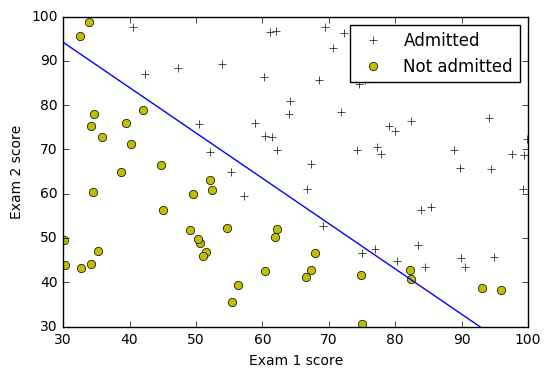

In [9]:
from plot_decision_boundary import plot_decision_boundary


plt.figure()
plot_data(X[:, 1:], y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)

# Plot Boundary
plot_decision_boundary(theta, X, y)
plt.show()

## Part 4: Predict and Accuracies


Predict probability for a student with score 45 on exam 1 and score 85 on exam 2: 

In [10]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print 'For a student with scores 45 and 85, we predict an admission probability of', prob

For a student with scores 45 and 85, we predict an admission probability of 0.77629062453


The `predict()` predicts the input data with learned logistic regression parameters.

In [11]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters theta.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    ndarray, shape (n_samples,)
        The predictions for X using a threshold at 0.5.
    """
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

Compute accuracy on our training set: 

In [12]:
p = predict(theta, X)
print 'Train Accuracy:', np.mean(p == y) * 100

Train Accuracy: 89.0
